In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import deque
from urllib import request, parse

In [2]:
queue = deque([])
crawledList = []
LINK_LIMIT = 3650

def BFSWebCrawler(url):
    crawledList.append(url)
    # print(len(queue))
    if len(queue) >= LINK_LIMIT:
        return
    # print("Crawling: ", url)  # Prints the url entered by user
    # returns back a request and takes care of 403 error
    req = request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = request.urlopen(req).read()  # Creates the html document
    soup = BeautifulSoup(html, "html.parser")  # Parses the html into an object
    for a_tag in soup.findAll('a'):  # Finds all a tags
        crawledFlag = False
        if a_tag.has_attr('href'):  # The following execute only if a_tag has an href
            href = a_tag['href']  # Extracts href
            full_url = parse.urljoin(url, href)
            for links in queue:
                if links == full_url:
                    crawledFlag = True
                    break
            if not crawledFlag:
                # print(len(queue))
                if len(queue) >= LINK_LIMIT:
                    return
                if crawledList.count(full_url) == 0:
                    # print("appended", full_url)
                    queue.append(full_url)
                # else:
                #     print("NOT ADDED", full_url)
    n = queue.popleft()
    # print("POPPED", n)
    BFSWebCrawler(n)

In [3]:
user_url = input("Enter Url to Crawl: ")
BFSWebCrawler(user_url)
print("URLS Crawled: ")
for urls in crawledList:
    print(urls)

Enter Url to Crawl: https://www.investopedia.com/
URLS Crawled: 
https://www.investopedia.com/
https://www.investopedia.com/financial-term-dictionary-4769738
https://www.investopedia.com/economy-4689801
https://www.investopedia.com/corporate-finance-and-accounting-4689821
https://www.investopedia.com/terms/r/rothira.asp
https://www.investopedia.com/stocks-4427785
https://www.investopedia.com/mutual-funds-4427787
https://www.investopedia.com/terms/e/etf.asp
https://www.investopedia.com/terms/1/401kplan.asp
https://www.investopedia.com/investing-essentials-4689754
https://www.investopedia.com/fundamental-analysis-4689757
https://www.investopedia.com/portfolio-management-4689745
https://www.investopedia.com/trading-skills-and-essentials-4689654
https://www.investopedia.com/technical-analysis-4689657
https://www.investopedia.com/risk-management-4689652
https://www.investopedia.com/markets/
https://www.investopedia.com/company-news-4427705
https://www.investopedia.com/markets-news-4427704
h

In [4]:
import timeit
from random import choice

def createGraph(func, trials=10):
    nVal = []
    tVal = []
    for i in range(0, len(crawledList), 1):
        for j in range(trials):
            runtime = 0
            url = [choice(crawledList) for n in range(i)]
            start = timeit.default_timer()
            func(url)
            end = timeit.default_timer()
            runtime += (end - start) * 1000
        runtime = runtime/trials
        nVal.append(i)
        tVal.append(runtime)

    print(nVal)
    print(tVal)
    return nVal, tVal

In [5]:
nVal1, tVal1 = createGraph(BFSWebCrawler, trials=10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
[2.9999999640040187e-05, 2.000000023372195e-05, 3.0000000350582923e-05, 2.9999999640040187e-05, 2.9999999640040187e-05, 2.9999999640040187e-05, 3.0000000350582923e-05, 2.9999999640040187e-05, 2.9999999640040187e-05, 2.9999999640040187e-05, 1.9999999523179213e-05, 2.000000023372195e-05, 3.0000000350582923e-05, 2.9999999640040187e-05, 3.0000000350582923e-05, 2.9999999640040187e-05, 1.9999999523179213e-05, 2.000000023372195e-05, 2.9999999640040187e-05, 3.0000000350582923e-05, 2.9999999640040187e-05, 4.9999999873762135e-05, 2.000000023372195e-05, 0.00012999999938756446, 2.9999999640040187e-05, 3.0000000350582923e-05, 2.000000023372195e-05, 2

In [6]:
def bestFit(X,Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X)
    
    numer = sum(xi*yi for xi, yi in zip(X,Y)) - n * xbar * ybar
    denum = sum(xi**2 for xi in X) - n * xbar**2
    
    b = numer / denum
    a = ybar - b * xbar
    
    return a, b

Text(0.5, 1.0, 'BFSWebCrawler Time Complexity')

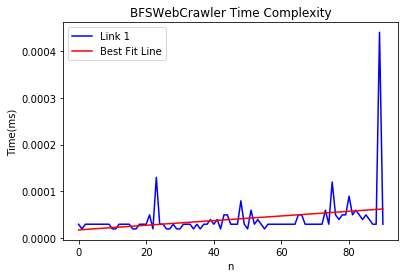

In [7]:
nVal, tVal = bestFit(nVal1, tVal1)
yfit = [nVal + tVal * xi for xi in nVal1]

plt.plot(nVal1, tVal1, color="blue", label="Link 1")
plt.plot(nVal1, yfit, color = "red", label = "Best Fit Line")
plt.xlabel('n')
plt.ylabel("Time(ms)")
plt.legend()
plt.title("BFSWebCrawler Time Complexity")